In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# averageRating

In [ ]:
# reading the dataset
train_df = pd.read_csv('train11.csv')
test_df = pd.read_csv("test3.csv")

In [ ]:
#splitting the dataset into training and testing
X_train = train_df.drop(['originalTitle','averageRating','ratingCount'], axis = 1)
y_train = train_df['averageRating']
X_test = test_df.drop(['originalTitle','averageRating','ratingCount'], axis = 1)
y_test = test_df['averageRating']

In [ ]:
# Train initial Decision Regression model
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

# Make predictions and evaluate initial performance
y_pred = dt.predict(X_test)
print("Initial Decision Tree Regression Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

Initial Decision Tree Regression Performance:
RMSE: 1.7486218091946797
R^2 Score: -0.6097395068926466


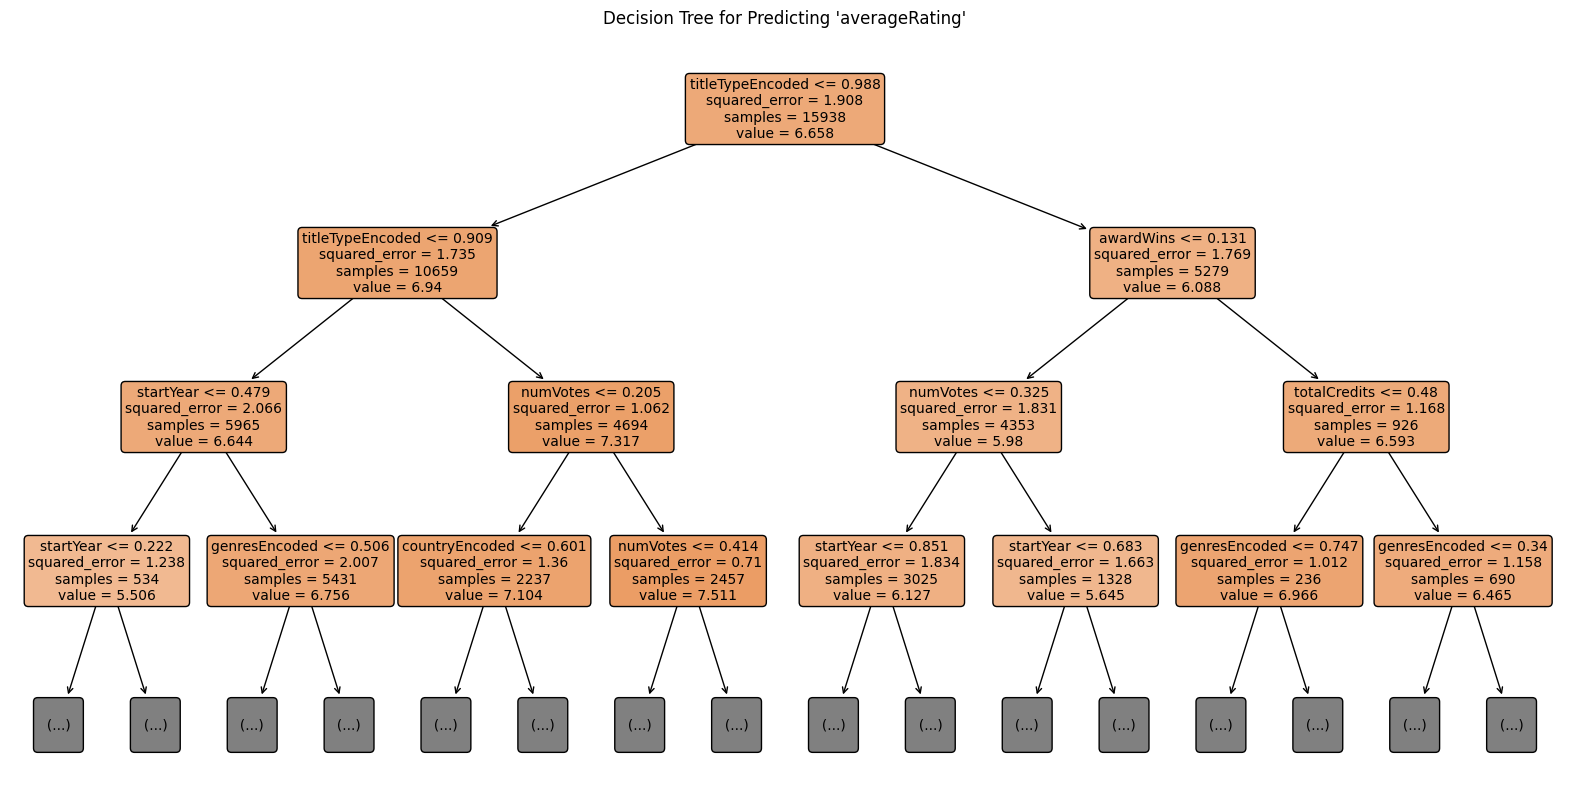

In [ ]:
import matplotlib.pyplot as plt

# Visualize the Decision Tree for averageRating
plt.figure(figsize=(20, 10))
plot_tree(dt,feature_names=X_train.columns, filled=True, rounded=True, fontsize=10, max_depth=3)  # Limit the depth for better visualization
plt.title("Decision Tree for Predicting 'averageRating'")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# GridSearchCV for averageRating
grid_search = GridSearchCV(estimator=dt,param_grid=param_grid,scoring='neg_mean_squared_error',cv=5,n_jobs=-1)
grid_search.fit(X_train, y_train)


# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [ ]:
# Train Decision Regression model with gridsearchcv parameters
dt = DecisionTreeRegressor(max_depth= 5, max_features= None, min_samples_leaf= 2, min_samples_split= 2)
dt.fit(X_train, y_train)

# Make predictions and evaluate initial performance
y_pred = dt.predict(X_test)
print("Initial Decision Tree Regression Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

Initial Decision Tree Regression Performance:
RMSE: 1.2509022613483036
R^2 Score: 0.1762212654392914


In [ ]:
# Define the parameter distributions for tuning
param_distributions = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2),
    'max_features': [None, 'sqrt', 'log2']
}
dt = DecisionTreeRegressor()

# RandomizedSearchCV for averageRating
random_search = RandomizedSearchCV(estimator=dt,param_distributions=param_distributions,n_iter=50,scoring='neg_mean_squared_error',cv=5,random_state=42,n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [ ]:
# Train Decision Regression model with randomsearchcv parameters
dt = DecisionTreeRegressor(max_depth= 5, max_features= None, min_samples_leaf= 2, min_samples_split= 2)
dt.fit(X_train, y_train)

# Make predictions and evaluate initial performance
y_pred = dt.predict(X_test)
print("Initial Decision Tree Regression Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

Initial Decision Tree Regression Performance:
RMSE: 1.2509022613483036
R^2 Score: 0.1762212654392914


In [ ]:
# Feature importance for DecisonTreeRegressor (non-zero coefficients)
importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": dt.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance (Linear Regression):")
print(importance)


Feature Importance (Linear Regression):
                        Feature  Importance
13             titleTypeEncoded    0.568347
0                     startYear    0.189352
3                      numVotes    0.095108
2                     awardWins    0.046160
14                genresEncoded    0.035344
1                runtimeMinutes    0.028349
7            criticReviewsTotal    0.009634
4                   totalImages    0.008875
15               countryEncoded    0.008361
6                  totalCredits    0.006671
11                   numRegions    0.003799
5                   totalVideos    0.000000
8   awardNominationsExcludeWins    0.000000
9               canHaveEpisodes    0.000000
10                      isAdult    0.000000
12             userReviewsTotal    0.000000


In [ ]:
# we tried to increase the accuracy using backward elimination removing the least important row
#splitting the dataset into training and testing
X_train = train_df.drop(['originalTitle','averageRating','isAdult','userReviewsTotal','canHaveEpisodes','totalVideos','numRegions','awardNominationsExcludeWins'], axis = 1)
y_train = train_df['averageRating']
X_test = test_df.drop(['originalTitle','averageRating','isAdult','userReviewsTotal','canHaveEpisodes','totalVideos','numRegions','awardNominationsExcludeWins'], axis = 1)
y_test = test_df['averageRating']

# Train Decision Regression model with randomsearchcv parameters
dt = DecisionTreeRegressor(max_depth= 5, max_features= None, min_samples_leaf= 2, min_samples_split= 2)
dt.fit(X_train, y_train)

# Make predictions and evaluate initial performance
y_pred = dt.predict(X_test)
print("Initial Decision Tree Regression Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

Initial Decision Tree Regression Performance:
RMSE: 1.2511116899414831
R^2 Score: 0.17594540493625788


# numVotes

In [ ]:
# reading the dataset
train_df = pd.read_csv('train9.csv')
test_df = pd.read_csv("test4.csv")

In [ ]:
#splitting the dataset into training and testing
X_train = train_df.drop(['originalTitle','numVotes','ratingCount'], axis = 1)
y_train = train_df['numVotes']
X_test = test_df.drop(['originalTitle','numVotes','ratingCount'], axis = 1)
y_test = test_df['numVotes']

In [ ]:
# Train initial Decision Regression model
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

# Make predictions and evaluate initial performance
y_pred = dt.predict(X_test)
print("Initial Decision Tree Regression Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

Initial Decision Tree Regression Performance:
RMSE: 0.137393758124991
R^2 Score: 0.4685730106548559


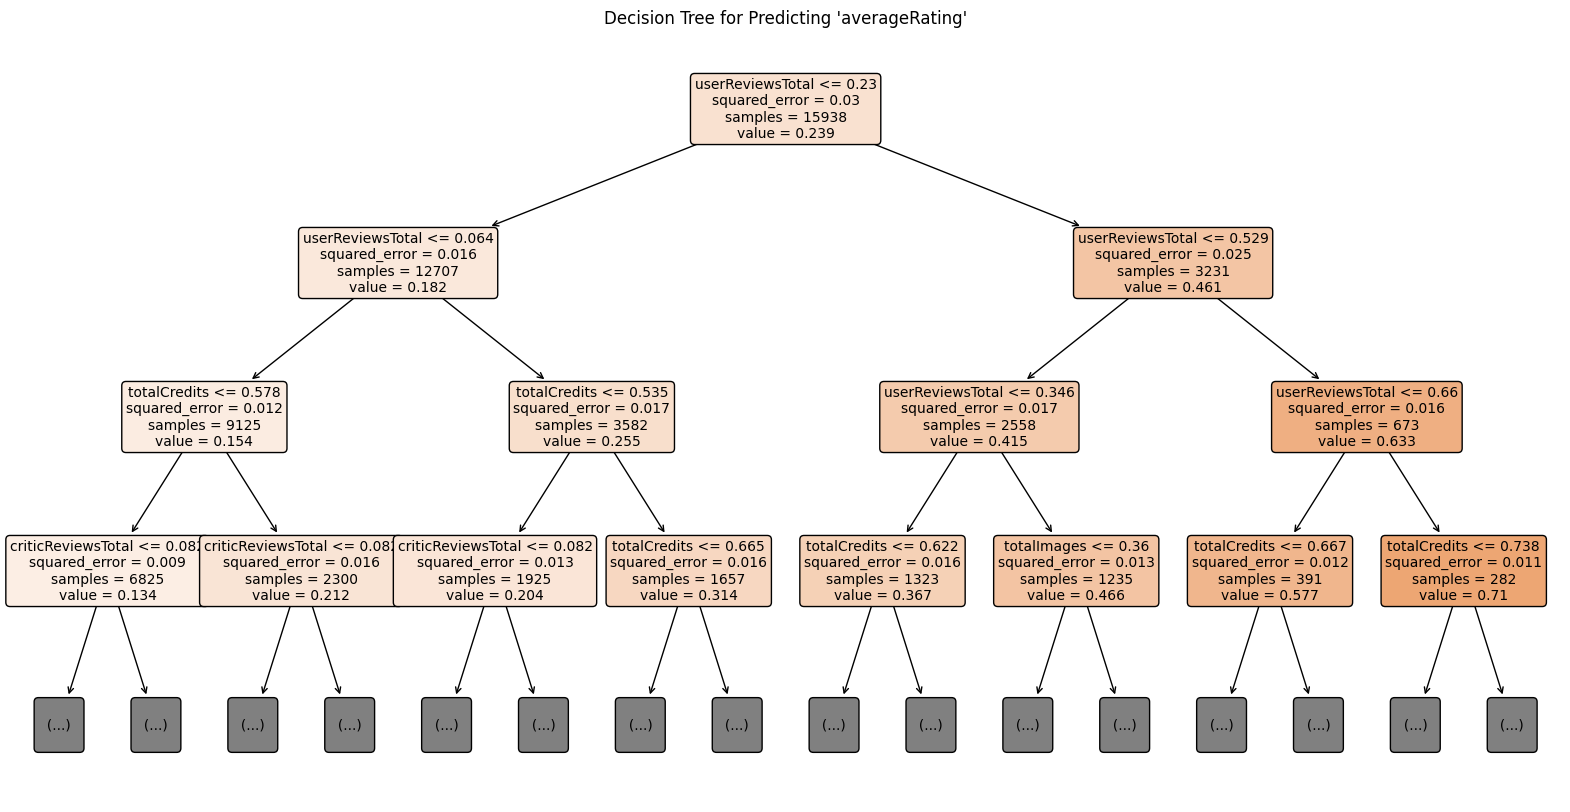

In [ ]:
import matplotlib.pyplot as plt

# Visualize the Decision Tree for averageRating
plt.figure(figsize=(20, 10))
plot_tree(dt,feature_names=X_train.columns, filled=True, rounded=True, fontsize=10, max_depth=3)  # Limit the depth for better visualization
plt.title("Decision Tree for Predicting 'numVotes'")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# GridSearchCV for averageRating
grid_search = GridSearchCV(estimator=dt,param_grid=param_grid,scoring='neg_mean_squared_error',cv=5,n_jobs=-1)
grid_search.fit(X_train, y_train)


# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 20}


In [ ]:
# Train Decision Regression model with gridsearchcv parameters
dt = DecisionTreeRegressor(max_depth= 5, max_features= None, min_samples_leaf= 2, min_samples_split= 2)
dt.fit(X_train, y_train)

# Make predictions and evaluate initial performance
y_pred = dt.predict(X_test)
print("Initial Decision Tree Regression Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

Initial Decision Tree Regression Performance:
RMSE: 0.11197258072081191
R^2 Score: 0.6470339158918735


In [ ]:
# Define the parameter distributions for tuning randomsearchcv
param_distributions = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2),
    'max_features': [None, 'sqrt', 'log2']
}
dt = DecisionTreeRegressor()

# RandomizedSearchCV for averageRating
random_search = RandomizedSearchCV(estimator=dt,param_distributions=param_distributions,n_iter=50,scoring='neg_mean_squared_error',cv=5,random_state=42,n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 20}


In [ ]:
# Train Decision Regression model with randomsearchcv parameters
dt = DecisionTreeRegressor(max_depth= 5, max_features= None, min_samples_leaf= 2, min_samples_split= 2)
dt.fit(X_train, y_train)

# Make predictions and evaluate initial performance
y_pred = dt.predict(X_test)
print("Initial Decision Tree Regression Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

Initial Decision Tree Regression Performance:
RMSE: 0.11197258072081191
R^2 Score: 0.6470339158918735


In [ ]:
# Feature importance for DecisonTreeRegressor (non-zero coefficients)
importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": dt.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance (Linear Regression):")
print(importance)


Feature Importance (Linear Regression):
                        Feature  Importance
11             userReviewsTotal    0.830237
5                  totalCredits    0.094099
6            criticReviewsTotal    0.036507
3                   totalImages    0.025316
10                   numRegions    0.004318
13             titleTypeEncoded    0.003812
12                averageRating    0.003124
0                     startYear    0.002587
1                runtimeMinutes    0.000000
2                     awardWins    0.000000
4                   totalVideos    0.000000
7   awardNominationsExcludeWins    0.000000
8               canHaveEpisodes    0.000000
9                       isAdult    0.000000
14                genresEncoded    0.000000
15               countryEncoded    0.000000


In [ ]:
# we tried to increase the accuracy using backward elimination removing the least important row
#splitting the dataset into training and testing
X_train = train_df.drop(['originalTitle','numVotes','ratingCount','isAdult','genresEncoded','countryEncoded','awardWins','canHaveEpisodes','totalVideos','runtimeMinutes','awardNominationsExcludeWins'], axis = 1)
y_train = train_df['numVotes']
X_test = test_df.drop(['originalTitle','numVotes','ratingCount','isAdult','genresEncoded','countryEncoded','awardWins','canHaveEpisodes','totalVideos','runtimeMinutes','awardNominationsExcludeWins'], axis = 1)
y_test = test_df['numVotes']

# Train Decision Regression model with randomsearchcv parameters
dt = DecisionTreeRegressor(max_depth= 5, max_features= None, min_samples_leaf= 2, min_samples_split= 2)
dt.fit(X_train, y_train)

# Make predictions and evaluate initial performance
y_pred = dt.predict(X_test)
print("Initial Decision Tree Regression Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test,y_pred))

Initial Decision Tree Regression Performance:
RMSE: 0.11197258072081191
R^2 Score: 0.6470339158918735


# totalCredits

In [ ]:
# reading the dataset
train_df = pd.read_csv('train9.csv')
test_df = pd.read_csv("test4.csv")

In [ ]:
#splitting the dataset into training and testing
X_train = train_df.drop(['originalTitle','totalCredits','ratingCount'], axis = 1)
y_train = train_df['totalCredits']
X_test = test_df.drop(['originalTitle','totalCredits','ratingCount'], axis = 1)
y_test = test_df['totalCredits']

In [ ]:
# Train initial Decision Regression model
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

# Make predictions and evaluate initial performance
y_pred = dt.predict(X_test)
print("Initial Decision Tree Regression Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

Initial Decision Tree Regression Performance:
RMSE: 0.16947470472479
R^2 Score: -0.04505097137148506


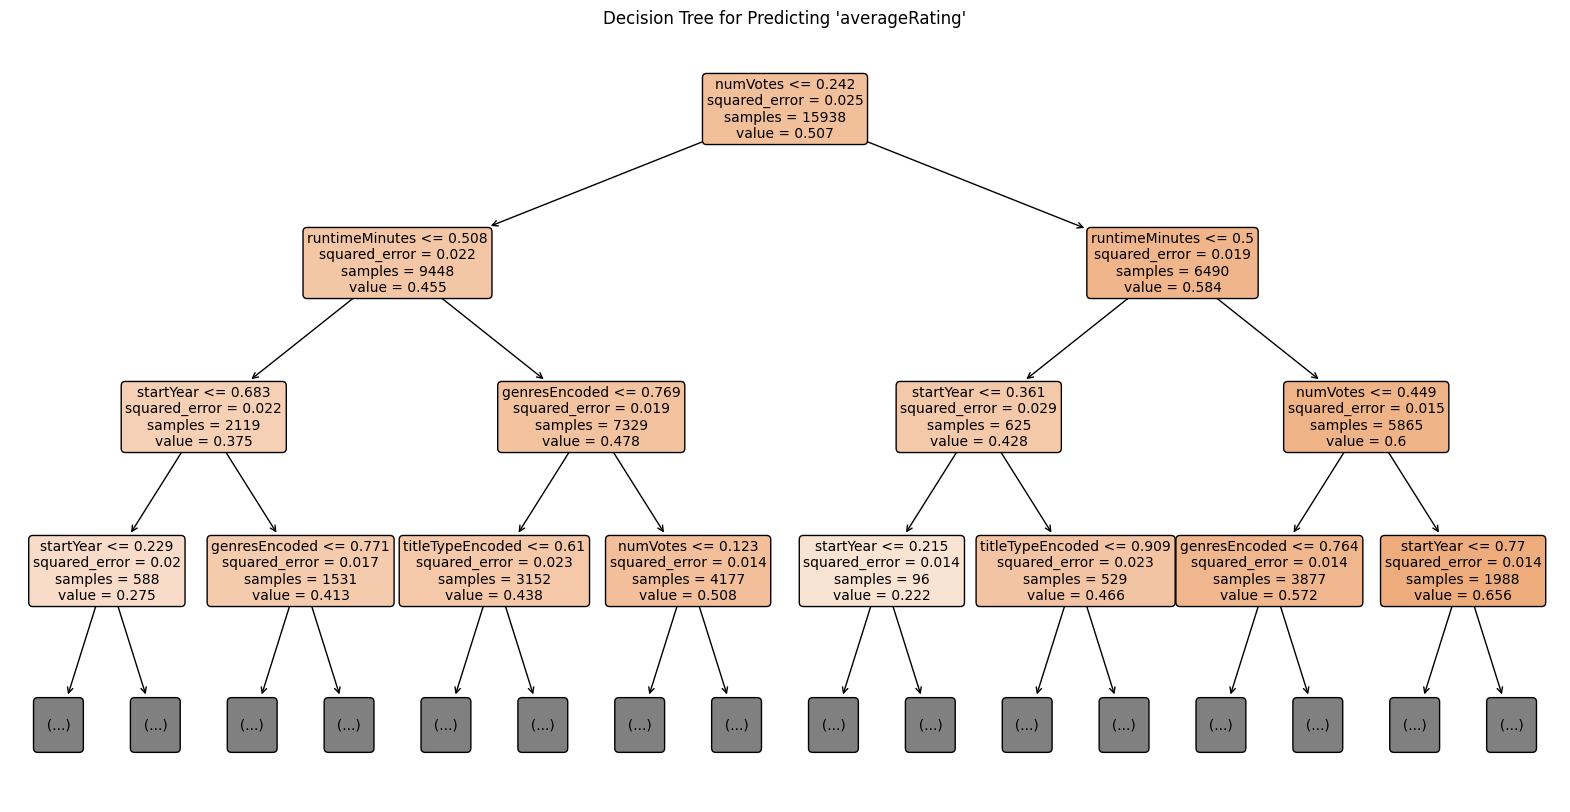

In [ ]:
import matplotlib.pyplot as plt

# Visualize the Decision Tree for averageRating
plt.figure(figsize=(20, 10))
plot_tree(dt,feature_names=X_train.columns, filled=True, rounded=True, fontsize=10, max_depth=3)  # Limit the depth for better visualization
plt.title("Decision Tree for Predicting 'averageRating'")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# GridSearchCV for averageRating
grid_search = GridSearchCV(estimator=dt,param_grid=param_grid,scoring='neg_mean_squared_error',cv=5,n_jobs=-1)
grid_search.fit(X_train, y_train)


# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 20}


In [ ]:
# Train Decision Regression model with gridsearchcv parameters
dt = DecisionTreeRegressor(max_depth= 5, max_features= None, min_samples_leaf= 2, min_samples_split= 2)
dt.fit(X_train, y_train)

# Make predictions and evaluate initial performance
y_pred = dt.predict(X_test)
print("Grid search Decision Tree Regression Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

Initial Decision Tree Regression Performance:
RMSE: 0.13607307526048013
R^2 Score: 0.3262913842116685


In [ ]:
# Define the parameter distributions for tuning
param_distributions = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2),
    'max_features': [None, 'sqrt', 'log2']
}
dt = DecisionTreeRegressor()

# RandomizedSearchCV for averageRating
random_search = RandomizedSearchCV(estimator=dt,param_distributions=param_distributions,n_iter=50,scoring='neg_mean_squared_error',cv=5,random_state=42,n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 20}


In [ ]:
# Train Decision Regression model with randomsearchcv parameters
dt = DecisionTreeRegressor(max_depth= 5, max_features= None, min_samples_leaf= 2, min_samples_split= 2)
dt.fit(X_train, y_train)

# Make predictions and evaluate initial performance
y_pred = dt.predict(X_test)
print("Initial Decision Tree Regression Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

Initial Decision Tree Regression Performance:
RMSE: 0.13607307526048013
R^2 Score: 0.32629138421166837


In [ ]:
# Feature importance for DecisonTreeRegressor (non-zero coefficients)
importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": dt.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance (Decision Tree Regression):")
print(importance)


Feature Importance (Linear Regression):
                        Feature  Importance
3                      numVotes    0.468011
1                runtimeMinutes    0.218871
0                     startYear    0.141589
14                genresEncoded    0.089104
13             titleTypeEncoded    0.038493
4                   totalImages    0.019356
15               countryEncoded    0.013603
8               canHaveEpisodes    0.010972
2                     awardWins    0.000000
5                   totalVideos    0.000000
6            criticReviewsTotal    0.000000
7   awardNominationsExcludeWins    0.000000
9                       isAdult    0.000000
10                   numRegions    0.000000
11             userReviewsTotal    0.000000
12                averageRating    0.000000


In [ ]:
# we tried to increase the accuracy using backward elimination removing the least important row
#splitting the dataset into training and testing
X_train = train_df.drop(['originalTitle','totalCredits','ratingCount','averageRating','criticReviewsTotal','awardWins','isAdult','userReviewsTotal','canHaveEpisodes','totalVideos','numRegions','awardNominationsExcludeWins'], axis = 1)
y_train = train_df['totalCredits']
X_test = test_df.drop(['originalTitle','totalCredits','ratingCount','averageRating','criticReviewsTotal','awardWins','isAdult','userReviewsTotal','canHaveEpisodes','totalVideos','numRegions','awardNominationsExcludeWins'], axis = 1)
y_test = test_df['totalCredits']

# Train Decision Regression model with randomsearchcv parameters
dt = DecisionTreeRegressor(max_depth= 5, max_features= None, min_samples_leaf= 2, min_samples_split= 2)
dt.fit(X_train, y_train)

# Make predictions and evaluate initial performance
y_pred = dt.predict(X_test)
print("Initial Decision Tree Regression Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

Initial Decision Tree Regression Performance:
RMSE: 0.13656436514078138
R^2 Score: 0.3214177714844533
